In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#drop entries with question marks, looks like those are unemployed
df = df[df.workclass != '?']
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46043 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           46043 non-null  int64 
 3   education        46043 non-null  object
 4   educational-num  46043 non-null  int64 
 5   marital-status   46043 non-null  object
 6   occupation       46043 non-null  object
 7   relationship     46043 non-null  object
 8   race             46043 non-null  object
 9   gender           46043 non-null  object
 10  capital-gain     46043 non-null  int64 
 11  capital-loss     46043 non-null  int64 
 12  hours-per-week   46043 non-null  int64 
 13  native-country   46043 non-null  object
 14  income           46043 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,46043.000000,4.604300e+04,46043.000000,46043.000000,46043.000000,46043.000000
mean,38.552549,1.898106e+05,10.128358,1114.090633,88.710075,40.945790
std,13.205813,1.054726e+05,2.564224,7588.765004,405.275023,12.012468
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378565e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


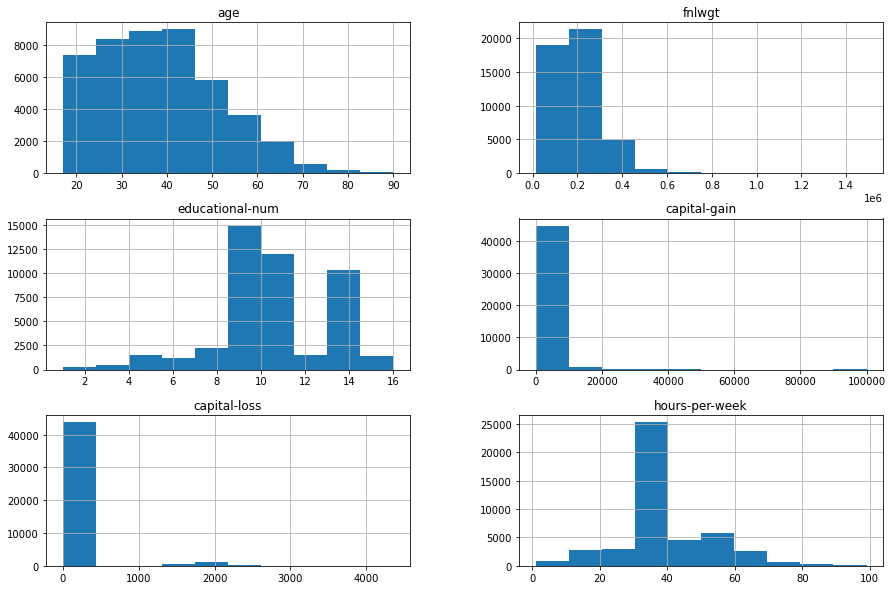

In [6]:
#create histograms
df.hist(figsize=(15,10))
plt.show()

Correlation between various features


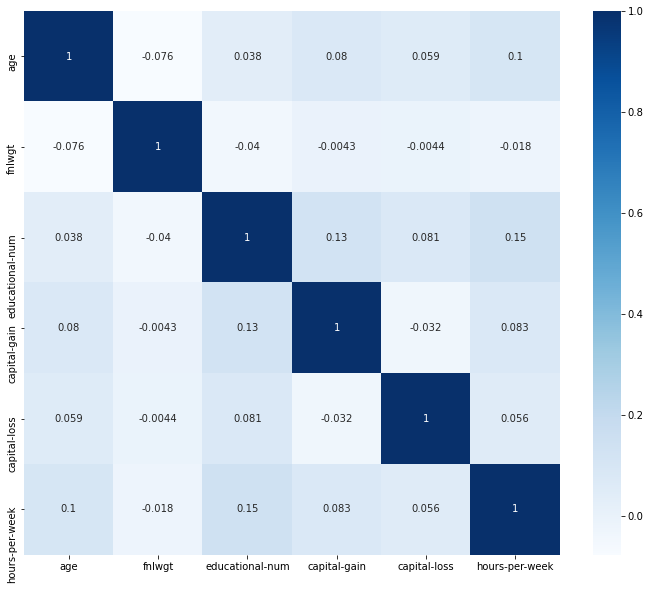

In [7]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

<AxesSubplot:ylabel='income'>

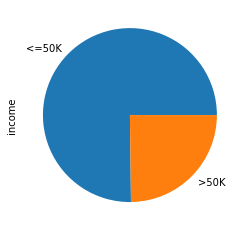

In [8]:
#take a look at the dependent variable - income
df['income'].value_counts().plot(kind='pie')

About 75% of adults make $50,000 or less according to our dataset.

In [9]:
#we have two possible outcomes, which we can basically look at as below average income and above average income
#remove any leading and trailing spaces
df['income'] = df['income'].str.strip()
#split into two datasets
below_average = df.loc[df['income'] == '<=50K']
above_average = df.loc[df['income'] == '>50K']

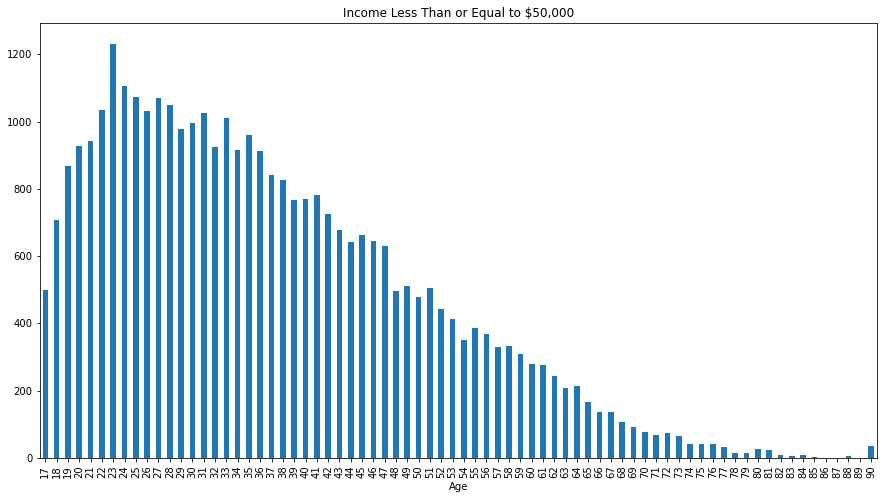

In [10]:
#relationship between age and income
plt.figure(figsize=(15,8))
below_average['age'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Income Less Than or Equal to $50,000')
plt.xlabel('Age')
plt.show()

There are more younger people that make $50,000 or less. As the age increases, that number starts to drop.

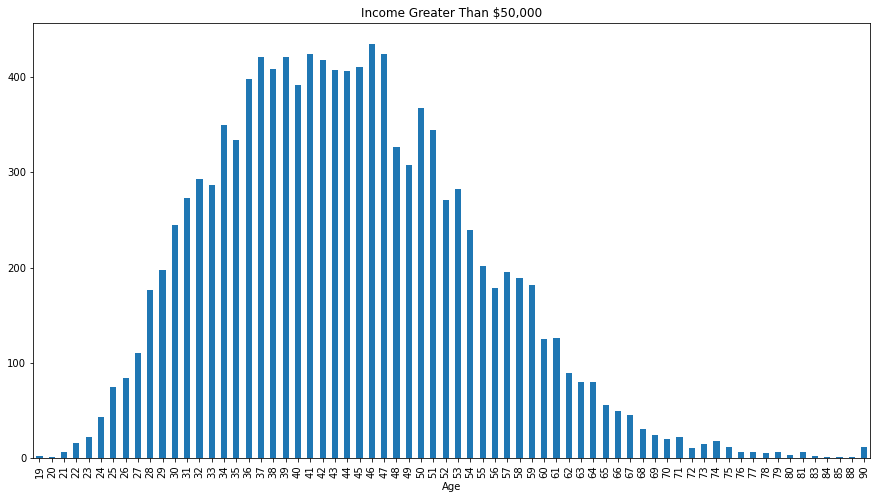

In [11]:
#plot same graph for income above 50k
plt.figure(figsize=(15,8))
above_average['age'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Income Greater Than $50,000')
plt.xlabel('Age')
plt.show()

Most of the people making more than $50,000 are middle aged people. We can see as the age gets closer to the retirement age, there is a drop in the number of people making over $50,0000. Comparing the two graphs, we can see that at every age, there are always more people making $50,000 or less than there are people making more than $50,000.

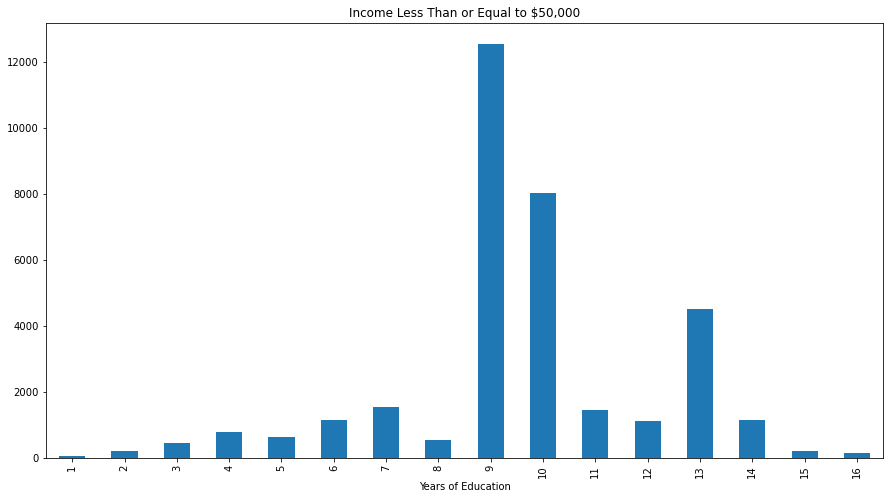

In [12]:
#find relationship between years of education and income
plt.figure(figsize=(15,8))
below_average['educational-num'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Income Less Than or Equal to $50,000')
plt.xlabel('Years of Education')
plt.show()

Most people making $50,000 or less had 9-10 years of education, but we also see a spike in 13 years.

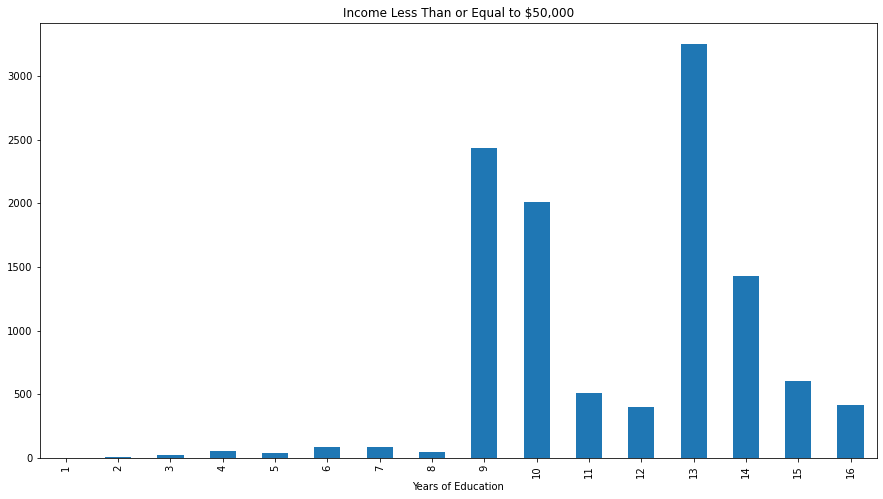

In [13]:
#Greater than $50,000
plt.figure(figsize=(15,8))
above_average['educational-num'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Income Less Than or Equal to $50,000')
plt.xlabel('Years of Education')
plt.show()

We see highs for the same years of education here, so it could just be that most of our sample are people with 9, 10, and 13 years of education.

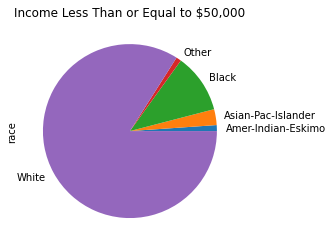

In [14]:
#race
below_average['race'].value_counts().sort_index().plot(kind = 'pie')
plt.title('Income Less Than or Equal to $50,000')
plt.show()

Mostly consists of white people and then black people at a distant second.

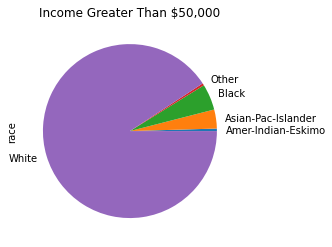

In [15]:
#over 50k
above_average['race'].value_counts().sort_index().plot(kind = 'pie')
plt.title('Income Greater Than $50,000')
plt.show()

Increase in percentage of white people and a decrease in the percentage of black people.

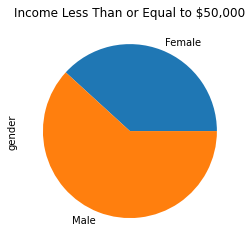

In [16]:
#gender
below_average['gender'].value_counts().sort_index().plot(kind = 'pie')
plt.title('Income Less Than or Equal to $50,000')
plt.show()

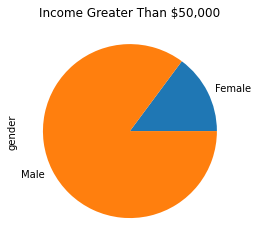

In [17]:
#gender great than 50k
above_average['gender'].value_counts().sort_index().plot(kind = 'pie')
plt.title('Income Greater Than $50,000')
plt.show()

We see there is a significantly greater percentage of adults making over $50,000 being male than female.

In [18]:
bins = [-np.inf, 39.5, 40.5, np.inf]
labels = ['Under 40', '40', 'Over 40']
df['hours-per-week'] = pd.cut(df['hours-per-week'], bins, labels = labels)
#split into two datasets
below_average = df.loc[df['income'] == '<=50K']
above_average = df.loc[df['income'] == '>50K']

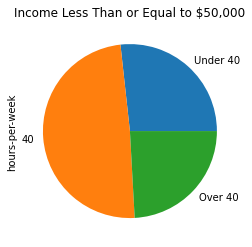

In [19]:
#hours per week
below_average['hours-per-week'].value_counts().sort_index().plot(kind = 'pie')
plt.title('Income Less Than or Equal to $50,000')
plt.show()

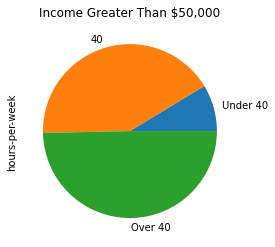

In [20]:
#hours per week great than 50k
above_average['hours-per-week'].value_counts().sort_index().plot(kind = 'pie')
plt.title('Income Greater Than $50,000')
plt.show()

Most adults making over $50,000 have to work over 40 hours a week.